In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button
%matplotlib notebook

In [5]:
df = pd.read_csv('parents.dat', delimiter=' ')
# delete a few specified rows at index values 0, 15, 20.
# Note that the index values do not always align to row numbers.
df = df.drop(labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], axis=0)

# Crear un nuevo DataFrame con las columnas 'X', 'Y', 'Z'
new_df = pd.DataFrame({'X': df['X'].astype(float), 'Y': df['Y'].astype(float), 'Z': df['Z'].astype(float)})

<IPython.core.display.Javascript object>


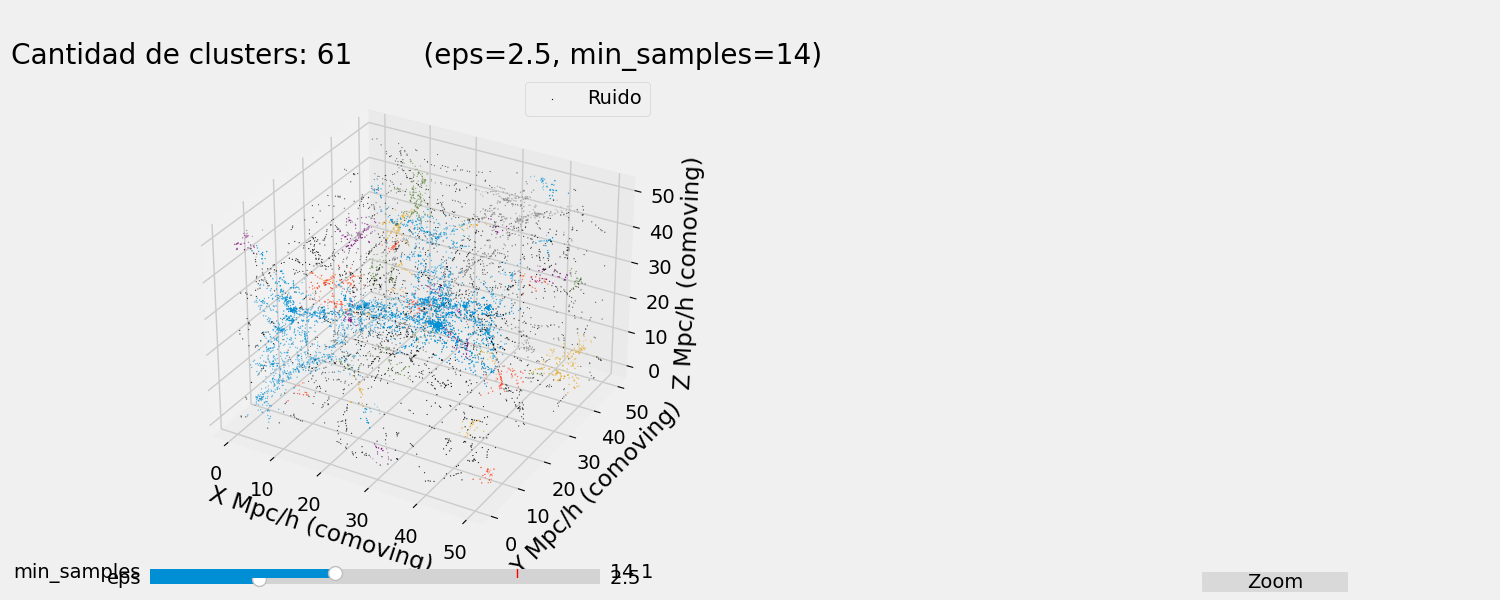

In [10]:
def update(val):
    eps = s_eps.val
    min_samples = int(s_min_samples.val)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    new_df['cluster'] = dbscan.fit_predict(new_df[['X', 'Y', 'Z']])
    labels = new_df['cluster'].values

    ax_3d.clear()
    ax_3d.scatter(new_df['X'][labels == -1], new_df['Y'][labels == -1], new_df['Z'][labels == -1], color='black', label='Ruido', s=0.15)

    for cluster_id in set(new_df['cluster']):
        if cluster_id != -1:
            cluster_points = new_df[new_df['cluster'] == cluster_id]
            ax_3d.scatter(cluster_points['X'], cluster_points['Y'], cluster_points['Z'], s=0.25)

    ax_3d.set_title('Cantidad de clusters: %d        (eps=%.1f, min_samples=%d)' % (len(set(labels)) - (1 if -1 in labels else 0), eps, min_samples))
    ax_3d.set_xlabel('X Mpc/h (comoving)')
    ax_3d.set_ylabel('Y Mpc/h (comoving)')
    ax_3d.set_zlabel('Z Mpc/h (comoving)')
    ax_3d.legend()

    fig.canvas.draw_idle()


def on_click(event):
    if event.inaxes == ax_3d:
        ax_3d.set_xlim(ax_3d.get_xlim()[0] * zoom_factor, ax_3d.get_xlim()[1] * zoom_factor)
        ax_3d.set_ylim(ax_3d.get_ylim()[0] * zoom_factor, ax_3d.get_ylim()[1] * zoom_factor)
        ax_3d.set_zlim(ax_3d.get_zlim()[0] * zoom_factor, ax_3d.get_zlim()[1] * zoom_factor)
        fig.canvas.draw_idle()


# Assuming you have a DataFrame named new_df with columns 'X', 'Y', 'Z'

# Create initial DBSCAN object
eps_init = 2.5
min_samples_init = 25
dbscan = DBSCAN(eps=eps_init, min_samples=min_samples_init)

# Apply DBSCAN to the data
new_df['cluster'] = dbscan.fit_predict(new_df[['X', 'Y', 'Z']])
labels = new_df['cluster'].values

# Create a figure and 3D axis
fig = plt.figure(figsize=(15, 6))
ax_3d = fig.add_subplot(121, projection='3d')

# Initial scatter plot
ax_3d.scatter(new_df['X'][labels == -1], new_df['Y'][labels == -1], new_df['Z'][labels == -1], color='black', label='Ruido', s=0.15)

for cluster_id in set(new_df['cluster']):
    if cluster_id != -1:
        cluster_points = new_df[new_df['cluster'] == cluster_id]
        ax_3d.scatter(cluster_points['X'], cluster_points['Y'], cluster_points['Z'], s=0.25)

ax_3d.set_title('Cantidad de clusters: %d        (eps=%.1f, min_samples=%d)' % (len(set(labels)) - (1 if -1 in labels else 0), eps_init, min_samples_init))
ax_3d.set_xlabel('X Mpc/h (comoving)')
ax_3d.set_ylabel('Y Mpc/h (comoving)')
ax_3d.set_zlabel('Z Mpc/h (comoving)')
ax_3d.legend()

# Set up the sliders
axcolor = 'lightgoldenrodyellow'
ax_eps = plt.axes([0.1, 0.02, 0.3, 0.03], facecolor=axcolor)
ax_min_samples = plt.axes([0.1, 0.07, 0.3, 0.03], facecolor=axcolor)

s_eps = Slider(ax_eps, 'eps', 0.1, 10.0, valinit=eps_init)
s_min_samples = Slider(ax_min_samples, 'min_samples', 3, 30, valinit=min_samples_init)

# Add zoom button
ax_zoom = plt.axes([0.8, 0.01, 0.1, 0.04])
zoom_button = Button(ax_zoom, 'Zoom')

# Define zoom factor
zoom_factor = 1.2

# Connect button click event
zoom_button.on_clicked(on_click)

# Connect sliders to update function
s_eps.on_changed(update)
s_min_samples.on_changed(update)

plt.show()